In [3]:
!pip install tensorflow-datasets

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [4]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_mujoco_ant',
 'd4rl_mujoco_halfcheetah',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiab

In [6]:
# get information on data
builder = tfds.builder('cats_vs_dogs')
builder.info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='/home/misu/tensorflow_datasets/cats_vs_dogs/4.0.0',
    download_size=786.68 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},


In [9]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-18 20:55:49           7818        673  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4760        392  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1595        138  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [10]:
!kaggle datasets download -d alessiocorrado99/animals10

100%|████████████████████████████████████████| 586M/586M [01:01<00:00, 12.9MB/s]
100%|████████████████████████████████████████| 586M/586M [01:01<00:00, 10.0MB/s]


In [5]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD

DATADIR = "large_data/"
CATEGORIES = ['furry', 'notfurry']
SIZE = 200
RATIO = 0.2
BATCH_SIZE = 32
EPOCHS = 20

print('Constants initialized.')

Constants initialized.


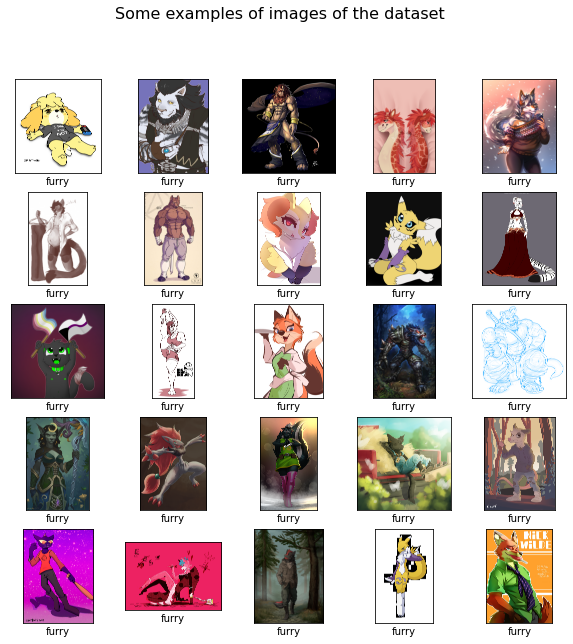

In [110]:
import os
from matplotlib import pyplot as plt

def display_examples(folder):
    """
        Display 25 images from the images array with its corresponding labels
    """
    path = os.path.join('large_dataset/dataset', folder)
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        images = os.listdir(path)
        idx = np.random.randint(0, len(images))
        arr = cv2.imread(os.path.join(path, images[idx]))
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        plt.imshow(arr, cmap=plt.cm.binary)
        plt.xlabel(folder)
    plt.show()
    
display_examples('furry')

In [1]:
from zipfile import ZipFile
# Create a ZipFile Object and load dataset.zip
with ZipFile('large_dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in dataset directory
   zipObj.extractall('large_dataset')
    
print('Dataset extracted.')

Dataset extracted.


In [7]:
from os import makedirs, listdir, path     # create directories
from shutil import copyfile                # move/swap files
from random import seed, random            # generate random dispersion

def create_dir(dataset_path):
  # organize dataset into a useful structure

  # create directories
  subdirs = ['train', 'test']

  for subdir in subdirs:
    # create label subdirectories
    for label in CATEGORIES:
      new = path.join(dataset_path, subdir, label)
      makedirs(new, exist_ok=True)
    
  # seed random number generator
  seed(1)
  
  # copy training dataset images into subdirectories
  for dir in CATEGORIES:
    head = path.join(dataset_path, dir)
    for file in listdir(head):
      src = path.join(head, file)
      dst = subdirs[0]
      if random() < RATIO:
        dst = subdirs[1]
      check = file.rsplit("_", 1)[1]
      if check.startswith(dir):
        dst = path.join(dataset_path, dst, dir, file)
        copyfile(src, dst)

  print('Directories are successfully created! Ready for modelling.')

create_dir('large_dataset/dataset')


Directories are successfully created! Ready for modelling.


In [2]:
# !pip install tensorflow
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path = 'large_dataset/dataset'
# create data generators
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

# keep test images unmodified
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = train_datagen.flow_from_directory(os.path.join(path, 'train'),
    class_mode='binary', batch_size=BATCH_SIZE, target_size=(SIZE, SIZE))
test_it = test_datagen.flow_from_directory(os.path.join(path, 'test'),
    class_mode='binary', batch_size=BATCH_SIZE, target_size=(SIZE, SIZE))

print('Initiated data generators.')

Found 17589 images belonging to 2 classes.
Found 4479 images belonging to 2 classes.
Initiated data generators.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#     model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

earlystop = EarlyStopping(patience = 5)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.5, min_lr = 0.00001)
mc = ModelCheckpoint('furspect_best.h5', monitor='val_accuracy', mode='max', verbose=1)
callbacks = [earlystop,learning_rate_reduction, mc]

print('Callbacks are setup.')

Callbacks are setup.


In [9]:
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=EPOCHS, verbose=1, callbacks=[callbacks], shuffle=True)

Epoch 1/20
404/550 [=====================>........] - ETA: 6:20 - loss: 2.8345 - accuracy: 0.8244

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


550/550 [==============================] - ETA: 0s - loss: 2.1725 - accuracy: 0.8454

/usr/lib/python3/dist-packages/PIL/Image.py:2763: DecompressionBombWarning: Image size (152924744 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


550/550 [==============================] - 1616s 3s/step - loss: 2.1725 - accuracy: 0.8454 - val_loss: 0.6051 - val_accuracy: 0.9384

Epoch 00001: saving model to furspect_best.h5
Epoch 2/20
550/550 [==============================] - 1614s 3s/step - loss: 0.3151 - accuracy: 0.9302 - val_loss: 1.2476 - val_accuracy: 0.8171

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00002: saving model to furspect_best.h5
Epoch 3/20
550/550 [==============================] - 1620s 3s/step - loss: 0.1670 - accuracy: 0.9591 - val_loss: 0.5041 - val_accuracy: 0.9301

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00003: saving model to furspect_best.h5
Epoch 4/20
550/550 [==============================] - 1603s 3s/step - loss: 0.1262 - accuracy: 0.9713 - val_loss: 0.3277 - val_accuracy: 0.9558

Epoch 00004: saving model to furspect_best.h5
Epoch 5/20
550/550 [==============================] - 1608s 3s/step - loss: 0.1239 - 

In [10]:
# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

140/140 [==============================] - 161s 1s/step - loss: 0.3514 - accuracy: 0.9457
> 94.575


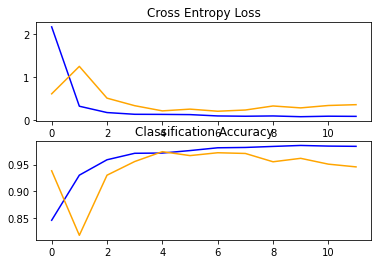

In [13]:
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.show()
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
summarize_diagnostics(history)

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Callbacks are setup.
Loaded model.
Epoch 1/20
275/275 [==============================] - 1538s 6s/step - loss: 2.9817 - accuracy: 0.8131 - val_loss: 8.4820 - val_accuracy: 0.8593
Epoch 2/20
275/275 [==============================] - 1537s 6s/step - loss: 0.3369 - accuracy: 0.8927 - val_loss: 1.8292 - val_accuracy: 0.9013
Epoch 3/20
275/275 [==============================] - 1532s 6s/step - loss: 0.2439 - accuracy: 0.9309 - val_loss: 0.6557 - val_accuracy: 0.9582
Epoch 4/20
275/275 [==============================] - 1535s 6s/step - loss: 0.1943 - accuracy: 0.9475 - val_loss: 0.4217 - val_accuracy: 0.9553
Epoch 5/20
275/275 [==============================] - 1534s 6s/step - loss: 0.1647 - accuracy: 0.9554 - val_loss: 0.2981 - val_accuracy: 0.9627
Epoch 6/20
275/275 [==============================] - 1534s 6s/step -

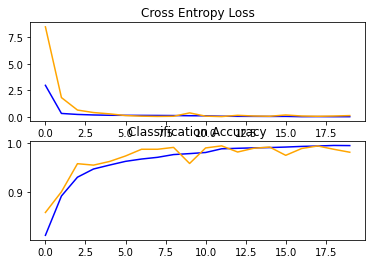

In [8]:
# !pip install matplotlib
!pip install scipy
!apt-get install python-scipy

import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD


def create_model():
# define cnn model (threeblock, dropout 25/50, batchnormalization, dense=512, rmsprop)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def load_path(path):
    model = load_model(path)
    print(model.summary())
    return model

def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.show()
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
    
def callbacks():
    from keras.callbacks import EarlyStopping, ReduceLROnPlateau
    earlystop = EarlyStopping(patience = 5)
    learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5, min_lr = 0.00001)
    mc = ModelCheckpoint('furspect_best.h5', monitor='val_accuracy', mode='max', verbose=1)
    callbacks = [earlystop,learning_rate_reduction, mc]

    print('Callbacks are setup.')
    return callbacks

def run_harness():
    
    # model = load_path('furspect_model2_1b.h5')
    model = create_model()
    cb = callbacks()
    
    print('Loaded model.')
    
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=EPOCHS, verbose=1, callbacks=[cb], shuffle=True)
    
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    print('> %.3f' % (acc * 100.0))
    
    summarize_diagnostics(history)

run_harness()
    

In [60]:
from tensorflow.keras.models import load_model
model = load_model('furspect_best_2.h5')

In [ ]:
# For a more creative and expressive way – you can draw a diagram of the architecture (hint – take a look at the keras.utils.vis_utils function).

In [ ]:
![image.png](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/03/inception-768x274.png)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


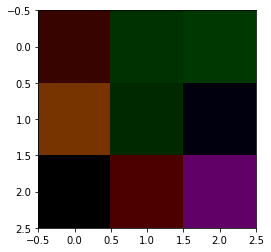

In [4]:
from matplotlib import pyplot as plt

top_layer = model.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

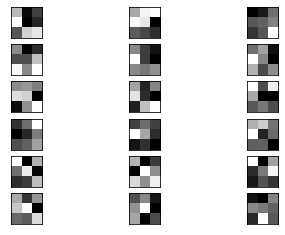

In [16]:

# attempting to visualize filters (separated by R, G, B)

from matplotlib import pyplot as plt

# retrieve weights from first convolutional hidden layer
filters, biases = model.layers[0].get_weights()

# normalize filter values to 0-1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

#plot filters
n_filters, ix = 6, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

In [ ]:
model.layers[0].get_weights()

In [18]:
# attempting to visualize feature maps
# idea: understand what features of an input are detected/preserved 
# in these feature maps.

# generally, feature maps close to input -> small/fine-grained detail
# generally, feature maps close to output -> large general features

# output featuremap after first convolutional layer (index 1)
from tensorflow.keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[0].output)

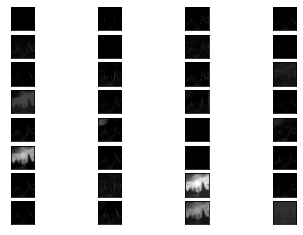

In [23]:
from PIL import Image
import numpy as np
from skimage import transform
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import cv2
import os

def load_image():
  path = 'large_dataset/dataset/'
  folder = ['furry/', 'notfurry/']
  chosen = folder[np.random.randint(0, 2)]
#   chosen = folder[0]

  dir = os.path.join(path, chosen)
  images = os.listdir(dir)
  # load all images into a list
  index = np.random.randint(0, len(images))
  file = images[index]

  np_image = Image.open(os.path.join(dir, file))
  np_image = np.array(np_image).astype('float32')/255
  np_image = transform.resize(np_image, (200, 200, 3))
  np_image = np.expand_dims(np_image, axis=0)
  # final_images.append(np_image)
  return np_image

image = load_image()
feature_maps = model.predict(image)

ix = 1
for _ in range(8):
	for _ in range(4):
		# specify subplot and turn of axis
		ax = plt.subplot(8, 4, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
        
# show the figure
plt.show()
# plot all 32 maps

32


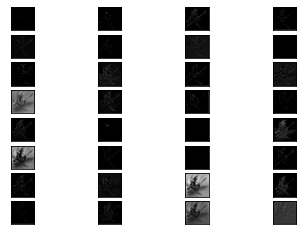

64


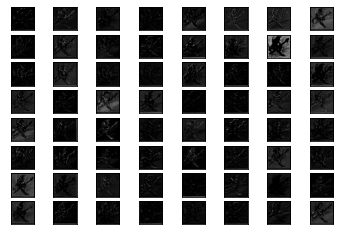

In [66]:
# redefine model to output right after the first hidden layer
from tensorflow.keras.models import load_model
model = load_model('furspect_best_2.h5')

ixs = [0, 4]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

from PIL import Image
import numpy as np
from skimage import transform
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import cv2
import os

def load_image():
  path = 'large_dataset/dataset/'
  folder = ['furry/', 'notfurry/']
  chosen = folder[np.random.randint(0, 2)]
#   chosen = folder[0]

  dir = os.path.join(path, chosen)
  images = os.listdir(dir)
  # load all images into a list
  index = np.random.randint(0, len(images))
  file = images[index]

  np_image = Image.open(os.path.join(dir, file))
  np_image = np.array(np_image).astype('float32')/255
  np_image = transform.resize(np_image, (200, 200, 3))
  np_image = np.expand_dims(np_image, axis=0)
  # final_images.append(np_image)
  return np_image

image = load_image()
feature_maps = model.predict(image)
    
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
    num = (fmap[0, :, :, :].shape)[2]
    if num == 32:
        col = 8
        row = 4
    elif num == 64:
        col = 8
        row = 8
        
    print(num)
    
    ix = 1
    for _ in range(col):
        for _ in range(row):
            # specify subplot and turn of axis
            ax = plt.subplot(col, row, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
            
    # show the figure
    plt.show()
    
'''
We can see that the feature maps closer 
to the input of the model capture a lot of 
fine detail in the image and that as we progress 
deeper into the model, the feature maps show less and less detail.

This pattern was to be expected, 
as the model abstracts the features from 
the image into more general concepts that can be used to make a 
classification. Although it is not clear from the final image 
that the model saw a bird, we generally lose the ability to 
interpret these deeper feature maps.
'''

In [ ]:
# Importance of visualizing a CNN Model
'''
It turned out that in the researchers’ dataset, 
photos of camouflaged tanks had been taken on cloudy days, 
while photos of plain forest had been taken on sunny days. 
The neural network had learned to distinguish cloudy days from 
sunny days, instead of distinguishing camouflaged tanks from an 
empty forest.
'''

In [67]:
# redefine model to output right after the first hidden layer
from tensorflow.keras.models import load_model
model = load_model('furspect_best_2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0

In [72]:
!pip install pydot
!pip install graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/tmp/furspect_model_2_plot.png', show_shapes=True)

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [77]:
# analyzing activation maps
# understand what sort of input patterns activate particulra filter

!pip install keras-vis
!pip install tensorflow

from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

In [ ]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

In [ ]:
from matplotlib import pyplot

# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [ ]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

In [ ]:
# plot feature map of first conv layer for given image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# redefine model to output right after the first hidden layer (warning: will edit model)
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
#img = preprocess_input(img) revise for model

# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
# img = preprocess_input(img) revise for model

# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

In [ ]:
for output_idx in np.arange(10):
   # Lets turn off verbose output this time to avoid clutter and just see the output.
   img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
   plt.figure()
   plt.title('Networks perception of {}'.format(output_idx))
   plt.imshow(img[..., 0])

In [ ]:


def iter_occlusion(image, size=8):
    # taken from https://www.kaggle.com/blargl/simple-occlusion-and-saliency-maps

   occlusion = np.full((size * 5, size * 5, 1), [0.5], np.float32)
   occlusion_center = np.full((size, size, 1), [0.5], np.float32)
   occlusion_padding = size * 2

   # print('padding...')
   image_padded = np.pad(image, ( \
   (occlusion_padding, occlusion_padding), (occlusion_padding, occlusion_padding), (0, 0) \
   ), 'constant', constant_values = 0.0)

   for y in range(occlusion_padding, image.shape[0] + occlusion_padding, size):

       for x in range(occlusion_padding, image.shape[1] + occlusion_padding, size):
           tmp = image_padded.copy()

           tmp[y - occlusion_padding:y + occlusion_center.shape[0] + occlusion_padding, \
             x - occlusion_padding:x + occlusion_center.shape[1] + occlusion_padding] \
             = occlusion

           tmp[y:y + occlusion_center.shape[0], x:x + occlusion_center.shape[1]] = occlusion_center

           yield x - occlusion_padding, y - occlusion_padding, \
             tmp[occlusion_padding:tmp.shape[0] - occlusion_padding, occlusion_padding:tmp.shape[1] - occlusion_padding]

i = 23 # for example
data = val_x[i]
correct_class = np.argmax(val_y[i])

# input tensor for model.predict
inp = data.reshape(1, 28, 28, 1)

# image data for matplotlib's imshow
img = data.reshape(28, 28)

# occlusion
img_size = img.shape[0]
occlusion_size = 4

print('occluding...')

heatmap = np.zeros((img_size, img_size), np.float32)
class_pixels = np.zeros((img_size, img_size), np.int16)

from collections import defaultdict
counters = defaultdict(int)

for n, (x, y, img_float) in enumerate(iter_occlusion(data, size=occlusion_size)):

    X = img_float.reshape(1, 28, 28, 1)
    out = model.predict(X)
    #print('#{}: {} @ {} (correct class: {})'.format(n, np.argmax(out), np.amax(out), out[0][correct_class]))
    #print('x {} - {} | y {} - {}'.format(x, x + occlusion_size, y, y + occlusion_size))

    heatmap[y:y + occlusion_size, x:x + occlusion_size] = out[0][correct_class]
    class_pixels[y:y + occlusion_size, x:x + occlusion_size] = np.argmax(out)
    counters[np.argmax(out)] += 1

In [ ]:
class_idx = 0
indices = np.where(val_y[:, class_idx] == 1.)[0]

# pick some random input from here.
idx = indices[0]

# Lets sanity check the picked image.
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

plt.imshow(val_x[idx][..., 0])


from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=val_x[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')


# This corresponds to the Dense linear layer.
for class_idx in np.arange(10): 
    indices = np.where(val_y[:, class_idx] == 1.)[0]
    idx = indices[0]

    f, ax = plt.subplots(1, 4)
    ax[0].imshow(val_x[idx][..., 0])
 
    for i, modifier in enumerate([None, 'guided', 'relu']):
        grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, 
        seed_input=val_x[idx], backprop_modifier=modifier)
        if modifier is None:
            modifier = 'vanilla'
        ax[i+1].set_title(modifier) 
        ax[i+1].imshow(grads, cmap='jet')

In [ ]:
from vis.visualization import visualize_cam

# This corresponds to the Dense linear layer.
for class_idx in np.arange(10): 
 indices = np.where(val_y[:, class_idx] == 1.)[0]
 idx = indices[0]

f, ax = plt.subplots(1, 4)
 ax[0].imshow(val_x[idx][..., 0])
 
for i, modifier in enumerate([None, 'guided', 'relu']):
    grads = visualize_cam(model, layer_idx, filter_indices=class_idx, 
    seed_input=val_x[idx], backprop_modifier=modifier) 
    if modifier is None:
        modifier = 'vanilla'
    ax[i+1].set_title(modifier) 
    ax[i+1].imshow(grads, cmap='jet')

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
plot_accuracy_loss(history)

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()



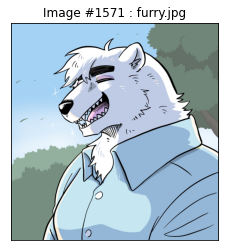

In [ ]:
# !pip install scikit-image
# !pip install opencv-python

from PIL import Image
import numpy as np
from skimage import transform
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import cv2

def load_image():
  path = 'large_dataset/dataset/'
  folder = ['furry/', 'notfurry/']
  chosen = folder[np.random.randint(0, 2)]
#   chosen = folder[0]

  dir = os.path.join(path, chosen)
  images = os.listdir(dir)
  # load all images into a list
  index = np.random.randint(0, len(images))
  file = images[index]


  plt.figure()
  arr = cv2.imread(os.path.join(dir, file))
  arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)

  plt.imshow(arr, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title('Image #{} : '.format(index) + file.rsplit("_", 1)[1])
  plt.show()

  np_image = Image.open(os.path.join(dir, file))
  np_image = np.array(np_image).astype('float32')/255
  np_image = transform.resize(np_image, (200, 200, 3))
  np_image = np.expand_dims(np_image, axis=0)
  # final_images.append(np_image)
  return np_image


def predict_image(model):
    image = load_image()
    model = load_model(model)
    res = model.predict(image, batch_size=10)

    final = 0
    consensus = "It's a furry!."
    if res > 0.5:
        final = 1
    if final == 1:
        consensus = "It's not a furry."

    print('Result: {0}'.format(res)) 
    print('Consensus: {0}'.format(consensus)) 
    print(res)
    return res

predict_image('furspect_best_2.h5')

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform

def load(count):
    path = 'large_dataset/dataset'
    folder = ['furry/', 'notfurry/']
    # chosen = folder[np.random.randint(0, 2)]
    chosen = folder[0]

    dir = os.path.join(path, chosen)
    images = os.listdir(dir)
    # load all images into a list
    final_images = []

    c = 0

    for image in images:
        if c >= count:
            break

        file = image

        # ignore webm
        if 'webm' in file:
          continue

        np_image = Image.open(os.path.join(dir, file))
        np_image = np.array(np_image).astype('float32')/255
        np_image = transform.resize(np_image, (200, 200, 3))
        np_image = np.expand_dims(np_image, axis=0)
        final_images.append(np_image)
        c += 1
        
    return np.vstack(final_images)


def predict(model, count):
  images = load(count)
  model = load_model(model)
  res = model.predict(images, batch_size=10)
  return res

pred_array = predict('furspect_best_2.h5', 100)

sum = 0
for i in pred_array:
  if i[0] < 0.50:
    sum += 1

print(sum / len(pred_array)) # prediction accuracy